**Using this template**

1. Change notebook title to assignment title you working on, eg. `Graded Challenge 1 or Milestone 1`
2. Put your identity such as name and batch number below notebook title.
3. Write your description before do any work. State your purpose of this assignment and what you are trying to achieve. 
4. Look at the rubric of this assignment and make sure you understand the criteria.
5. Code your solution in the cell provided below the working area section.
6. State your conlusions, findings, and any other relevant information in the cell provided below the conclusions sections.
7. Save this notebook and rename it to assignment title you working on  eg. `Graded Challenge 1 or Milestone 1`
8. Push your assignment before deadline.
9. Good Luck!

# Notebook Title

Live Code 2

Nama: Gusti Ayu Dewi Puspa Kartikasari

Batch: 012

## Description

### Objective

Do and answer the instructions and questions in live code 2

### Problem Statement
Problem 1:

Buatlah vektor yang merupakan representasi masing-masing kalimat berdasarkan tabel di atas dan hitung cosine similarity antar kedua vektor. Kemudian jawab pertanyaan berikut di markdown:


a. Apakah kedua kalimat memiliki konteks yang serupa? jika iya, mengapa dan jika tidak, mengapa (jawab berdasarkan hasil perhitungan cosine similaritynya)?


b. Jika meninjau dua buah vektor dan dihitung cosine similaritynya (cos theta), jelaskan secara singkat, jelas, padat apa makna cosine similarity yang bernilai 0 dan 1 (tinjau dari posisi dua vektor di koordinat kartesian)?


c. Apa kekurangan dari perhitungan kemiripan menggunakan cosine similarity?


Problem 2:

Menggunakan konsep integral untuk menghitung luas dibawah kurva, tentukan luas negara bagian Colorado jika diketahui koordinat batas-batasnya pada data yang sudah kamu ambil dari big query.

Jawab pertanyaan berikut di markdown:

a. Integral jenis apa yang diterapkan pada kasus ini? (Tertentu/Tak tentu) dan mengapa demikian? berikan alasan!

b. Untuk kasus ini, metode apa yang kamu pakai dalam perhitungan integral? secara simbolik atau numerik, dan mengapa?

c. Library Scipy menyediakan banyak function/modul untuk menghitung integral. Function apa yang kamu gunakan dan berikan alasan yang logis!

## Working Area

```txt
Put your code, analysis, everything below this line

Make sure to check everything the rubric requires before you submit
```

# PROBLEM 1

## import library needed

In [1]:
import numpy as np
import pandas as pd
import re
from scipy.integrate import trapz #import trapezoid

## Creating vector for each sentence

In [2]:
sentence1 = np.array([2,0,1,1,0,2,1,1])
sentence2 = np.array([2,1,1,0,1,1,1,1])

print(sentence1)
print(sentence2)

[2 0 1 1 0 2 1 1]
[2 1 1 0 1 1 1 1]


## Calculate cosine similarity between the two vector

In [3]:
dotprod = sentence1 @ sentence2
print('dot product from sentence 1 . sentence 2: ', dotprod)

cosine_similarity = dotprod/(np.linalg.norm(sentence1)*np.linalg.norm(sentence2))
print('cosine similarity sentence 1 and sentence 2: ', cosine_similarity)

dot product from sentence 1 . sentence 2:  9
cosine similarity sentence 1 and sentence 2:  0.8215838362577491


Note: Kemiripan kalimat 1 dan 2 yaitu 0.82 atau 82%

## Jawaban pertanyaan Problem 1:

1. Apakah kedua kalimat memiliki konteks yang serupa? jika iya, mengapa dan jika tidak, mengapa (jawab berdasarkan hasil perhitungan cosine similaritynya)?

**Jawab:  Kedua kalimat memiliki konteks yang hampir serupa, bisa dilihat dari perhitungan cosine similarity yakni 0.82 (pembulatan kebawah) yang dapat diartikan sebagai kalimat 1 dan kalimat 2 memiliki kemiripan 82%.**

2. Jika meninjau dua buah vektor dan dihitung cosine similaritynya (cos theta), jelaskan secara singkat, jelas, padat apa makna cosine similarity yang bernilai 0 dan 1 (tinjau dari posisi dua vektor di koordinat kartesian)?

**Jawab: cos theta atau cosine similarity yang bernilai 0 memiliki derajat cos 90 atau 270 derajat yang dapat diartikan bahwa kalimat 1 dan kalimat 2 tidak sejajar/tidak memiliki kemiripan sama sekali. Namun cos theta = 1 memiliki derajat 0,180 atau 360 derajat yang artinya kalimat1 dan kalimat2 sangat mirip atau sama dengan satu sama lainnya.**


3. Apa kekurangan dari perhitungan kemiripan menggunakan cosine similarity?

**Jawab: kekurangannya yaitu cosine similarity tidak memperhitungkan posisi atau susunan kalimat. Seperti andi mengejar ayam dan ayam mengejar andi akan terhitung sebagai sama, walau susunan membuat mereka memiliki arti yang berbeda.**


# PROBLEM 2

## Creating csv on google cloud platform
Gunakan tabel states pada dataset geo_us_boundaries. 
Pilih HANYA negara bagian Colorado (Informasi nama negara bagian terdapat di kolom state_name).

SQL Code:

select *

from `bigquery-public-data.geo_us_boundaries.states` as boundaries

where state_name = 'Colorado';

## Tampilkan data pada notebook (Data hanya mengandung satu baris saja)

In [4]:
data=pd.read_csv(r'h8dsft_P0LC2_Gusti_Ayu_Dewi_Puspa_Kartikasari.csv')
data

,geo_id,region_code,division_code,state_fips_code,state_gnis_code,state,state_name,lsad_code,mtfcc_feature_class_code,functional_status,area_land_meters,area_water_meters,int_point_lat,int_point_lon,int_point_geom,state_geom
0,8,4,8,8,1779779,CO,Colorado,0,G4000,A,268419875371,1184637800,38.993848,-105.508317,POINT(-105.5083165 38.9938482),"POLYGON((-109.050949 40.222647, -109.050952 40..."


### Gunakan fungsi berikut untuk membantu kamu agar data kamu siap digunakan dan tampilkan data yang sudah di-preprocess dengan fungsi tersebut. Kamu harus mengimport library re terlebih dahulu ke dalam pekerjaanmu.

## Import re

In [5]:
import re

## Using function to prepare the data

In [6]:
def data_preprocess(data):
   long = []
   lat = []
   for row in data['state_geom'][0].split(', '):
     row = re.sub('MULTIPOLYGON','',row)
     row = re.sub('POLYGON','',row)
     row = re.sub(r'\(','',row)
     row = re.sub(r'\)','',row)
     long.append(float(row.split(' ')[0]))
     lat.append(float(row.split(' ')[1]))
   return pd.DataFrame({'long':long,'lat':lat}).sort_values('long',ascending=True)

## create table name 'coordinate' to store the result and show the data

In [7]:
coordinate = data_preprocess(data) 

coordinate.head()

,long,lat
759,-109.060204,38.278238
760,-109.060187,38.275528
751,-109.060185,38.318670
743,-109.060180,38.344908
659,-109.060176,38.462300


Note: (long) adalah sumbu x dan Latitude (lat) adalah sumbu y nya. Wilayah Colorado dapat dibagi menjadi dua bagian yaitu Northern dan Southern menggunakan acuan nilai tengah latitude.

## Calculate Median of colorado

In [8]:
upper = np.max(coordinate.lat) #nilai latitude tertinggi
lower = np.min(coordinate.lat) #nilai latitude terendah
print('nilai latitude tertinggi: ', upper)
print('nilai latitude terendah: ', lower)

median = (upper+lower)/2
print('median: ', median) #nilai median

nilai latitude tertinggi:  41.003444
nilai latitude terendah:  36.992449
median:  38.9979465


## Calculate the total area of colorado

In [9]:
from scipy.integrate import trapz #import trapezoid

north = coordinate[coordinate.lat >= median] #sorting points that located above the median/north

south = coordinate[coordinate.lat < median] #sorting points that located below the median/south

north_area = trapz(north.lat,north.long) #trapz(Y,X) = trapz(latitude,longitude)
south_area = trapz(south.lat,south.long)

print('Luas area Colorado:',np.abs(north_area - south_area))


Luas area Colorado: 27.54223746015316


Luas area Colorado: 27.54223746015316

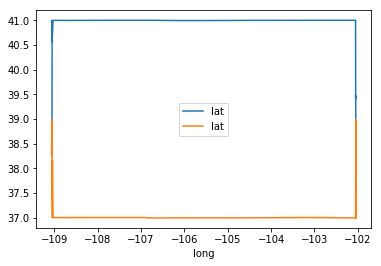

In [13]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
north.plot(x='long', y='lat',ax=ax)
south.plot(x='long', y='lat',ax=ax)


##Jawaban pertanyaan Problem 2:

1. Integral jenis apa yang diterapkan pada kasus ini? (Tertentu/Tak tentu) dan mengapa demikian? berikan alasan!

**Jawaban: Integral tertentu (definite integral), dikarenakan output yang didapatkan dalam bentuk numeric bukan simbolic serta memiliki data yang jelas untuk diolah sehingga memiliki batas tertentu pada perhitungannya(latitude sebagai y dan longitude sebagai x).**

2. Untuk kasus ini, metode apa yang kamu pakai dalam perhitungan integral? secara simbolik atau numerik, dan mengapa?

**Jawaban: numerik, karena hasil yang ingin didapat adalah dalam bentuk angka bukan fungsi. Metode symbolic akan menghasilkan hasil tanpa batasan tertentu yakni fungsi (f(x)), sedangkan numeric akan menghasilkan angka.**

3. Library Scipy menyediakan banyak function/modul untuk menghitung integral. Function apa yang kamu gunakan dan berikan alasan yang logis!

**Jawaban: Modul trapezoid. Dalam integral numeric terdapat 2 metode yakni trapezoid dan quad, dimana quad digunakan apabila data yang digunakan dalam bentuk fungsi dan trapezoid digunakan ketika data yang digunakan dalam bentuk array. Pada soal ini data dalam bentuk array sehingga trapezoid yang dipilih.**



# Conclusions, Assumptions, Overall Analysis

Jawaban pertanyaan Problem 1:
Kedua kalimat memiliki konteks yang hampir serupa dengan nilai kemiripan 82%. Nilai cos theta 0.82 mendekati nilai 1, yang menandakan vector kedua kalimat hampir membentuk derajat 0,180 atau 360 hampir sejajar. Namun cosine similarity memiliki kekurangan yaitu tidak memperhitungkan posisi atau susunan kalimat

Jawaban pertanyaan Problem 2:
Luas area colorado yang didapatkan yaitu: 27.54
Integral yang digunakan dalam perhitungan luas colorado adalah integral definite - numeric - modul trapezoid, dikarenakan output yang diharapkan dalam bentuk angka serta data yang digunakan dalam bentuk array (latitude dan longitude) yang menjadi batas perhitungan. 


